Student Name: Souri Student Number: 1832728

I choosed to work on the topic: EMployee Attrition. 

Employee attrition can be caused by many job related factors and personal issues however the effects of job related factors would be higher. Hence, knowing the circumstances that can cause attrition is important in prediction and therefore avoidin it for the managers.

----- Importing libraries and dataframe

In [109]:
import pandas as pd

In [110]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


-----Data cleaning and feature engineering

In [111]:
df.dropna()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


-------- Decode attrition (yes=1 , no=0)

In [112]:
df = pd.concat([df, pd.get_dummies(df['Attrition'])], axis=1)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,No,Yes
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,8,0,1,6,4,0,5,0,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,1,10,3,3,10,7,1,7,1,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,7,3,3,0,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,8,3,3,8,7,3,0,1,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,1,6,3,3,2,2,2,2,1,0


-------- Correlation

visualising correlation between features

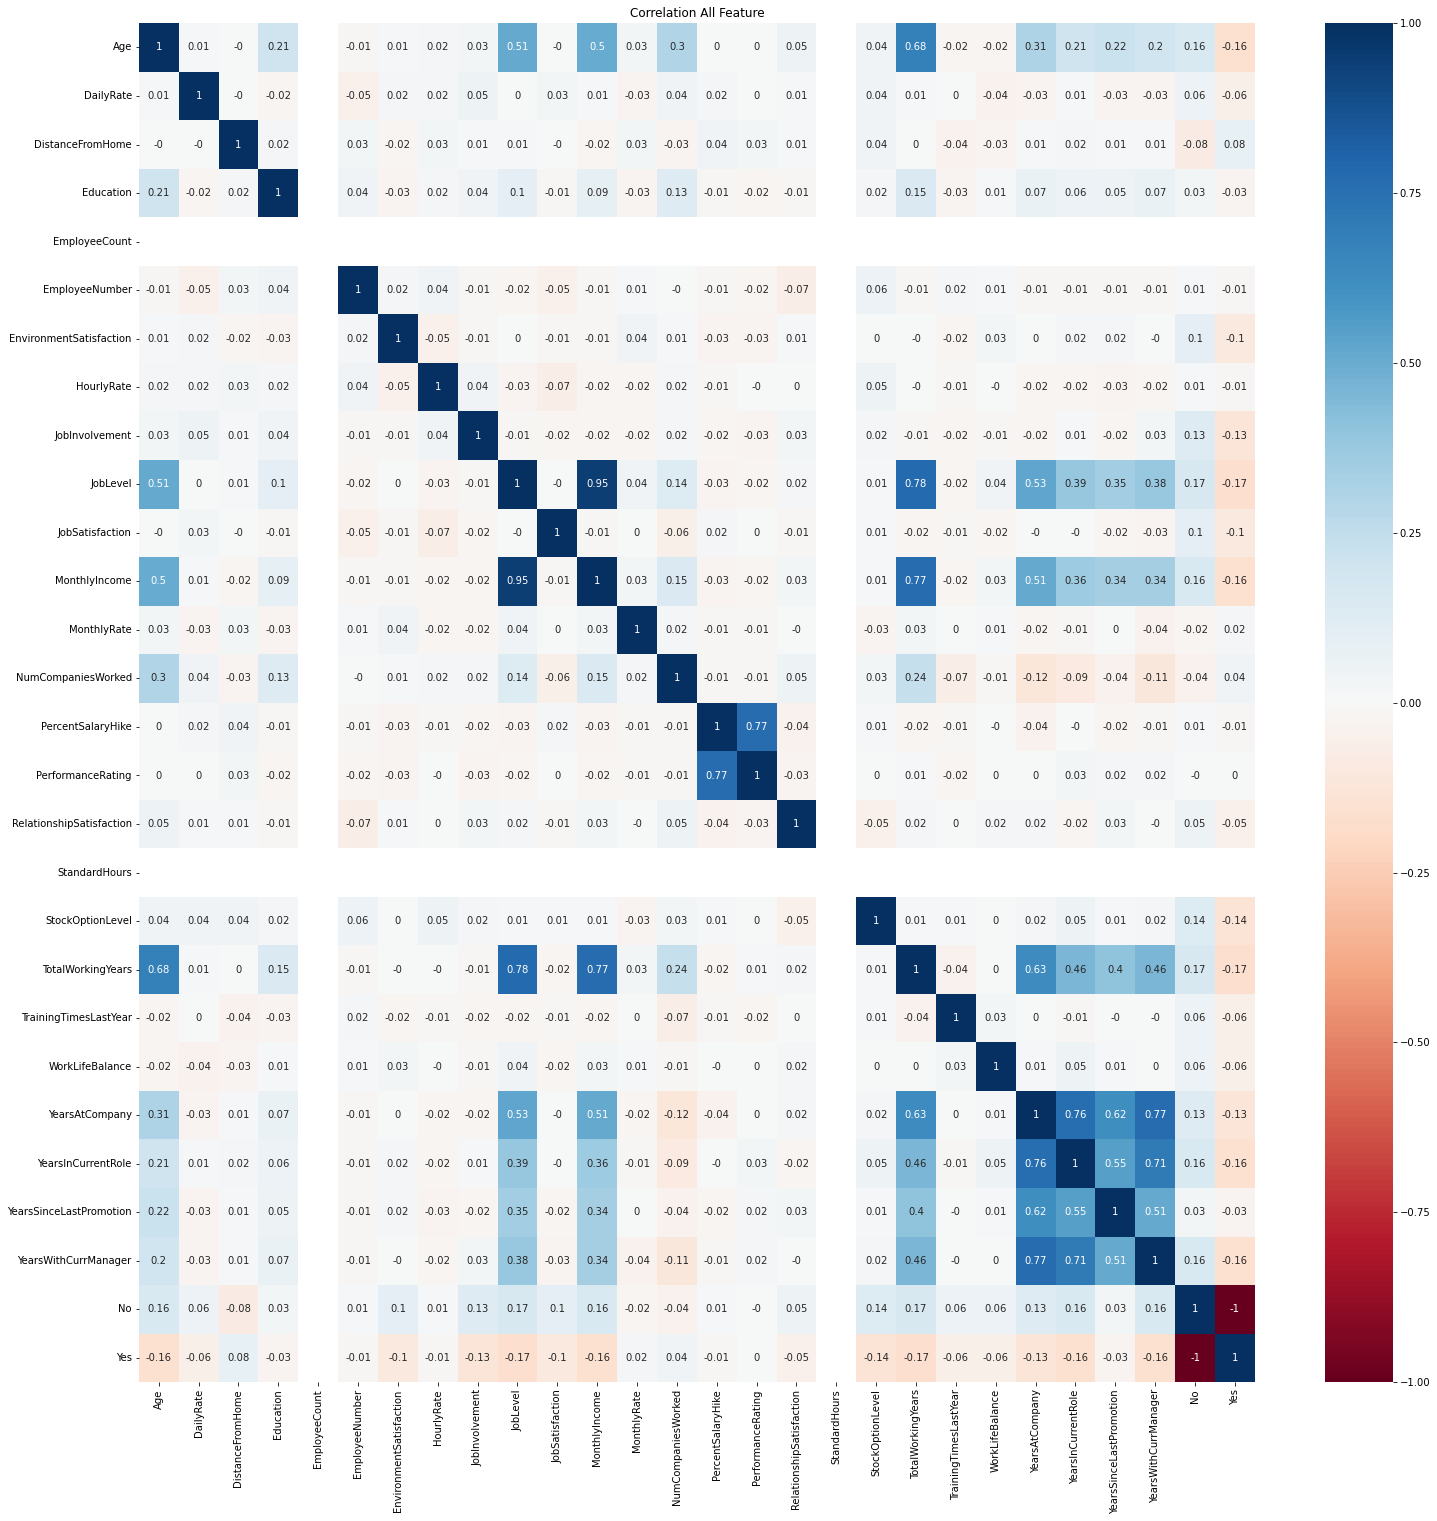

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(25,25))
cor = np.round(df.corr(),2)
sns.heatmap(cor, annot=True, cmap=plt.cm.RdBu)
plt.title("Correlation All Feature",fontsize=12)
plt.show()

-------- removing unnecessary columns

I selected those columns that has higher correlation with columns yes and no (more than 0.13)

In [114]:
df1 = df[["Attrition", "Yes", "Age", "JobLevel", "MonthlyIncome", "YearsInCurrentRole", "YearsWithCurrManager", "StockOptionLevel", "TotalWorkingYears"]]

In [115]:
df1.tail()

,Attrition,Yes,Age,JobLevel,MonthlyIncome,YearsInCurrentRole,YearsWithCurrManager,StockOptionLevel,TotalWorkingYears
1465,No,0,36,2,2571,2,3,1,17
1466,No,0,39,3,9991,7,7,1,9
1467,No,0,27,2,6142,2,3,1,6
1468,No,0,49,2,5390,6,8,0,17
1469,No,0,34,2,4404,3,2,0,6


------- Visualization

Pie, bar and scatter diagrams

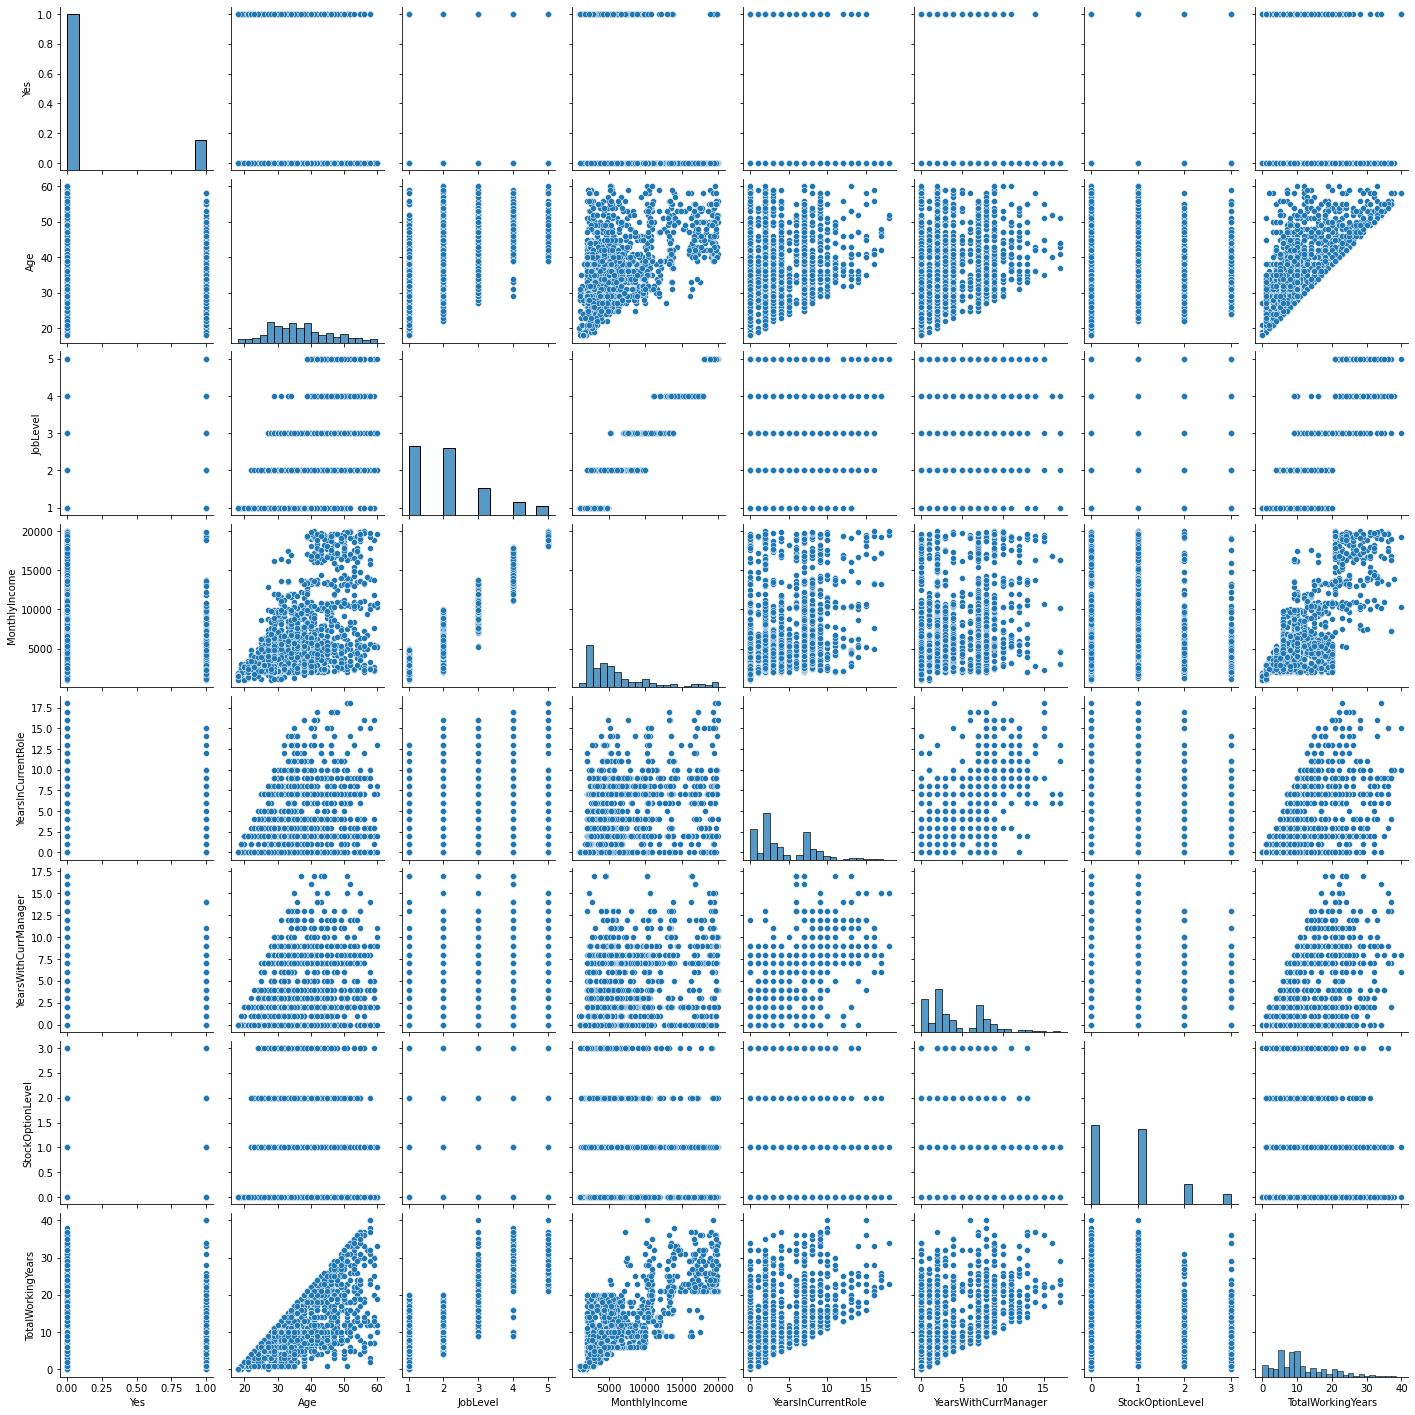

In [116]:
sns.pairplot(df1)
plt.show()

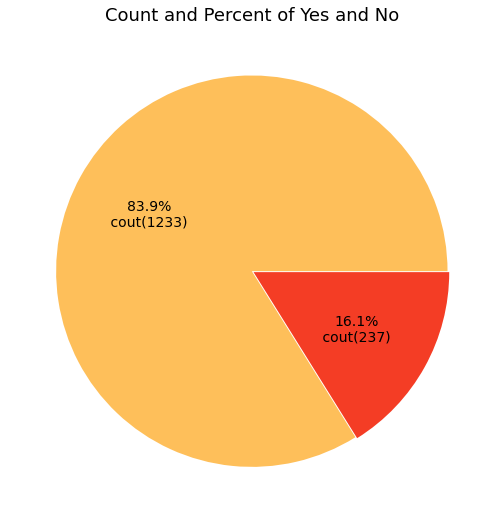

In [117]:
title_txt='Count and Percent of Yes and No'
y_label=''
x_label=''
item_color='YlOrRd'

data_plot=pd.DataFrame()
data_plot['index_name']=df1.groupby(by='Attrition').size().index
data_plot['count_val']=df1.groupby(by='Attrition').size().values

def fmt(x):
    return '{:.1f}%\n cout({:.0f}) '.format(x, data_plot['count_val'].sum()*x/100)

pat_color = sns.color_palette(item_color, len(data_plot))

plt.figure(figsize=(9,9))
explode=[0,0.01]
plt.pie(data_plot['count_val'],  
          colors=pat_color,
          autopct=fmt,
          explode=explode, textprops={'fontsize': 14})
plt.title(title_txt,fontsize=18)
plt.show()

16 percent of emolyers in our df were attrited at work.

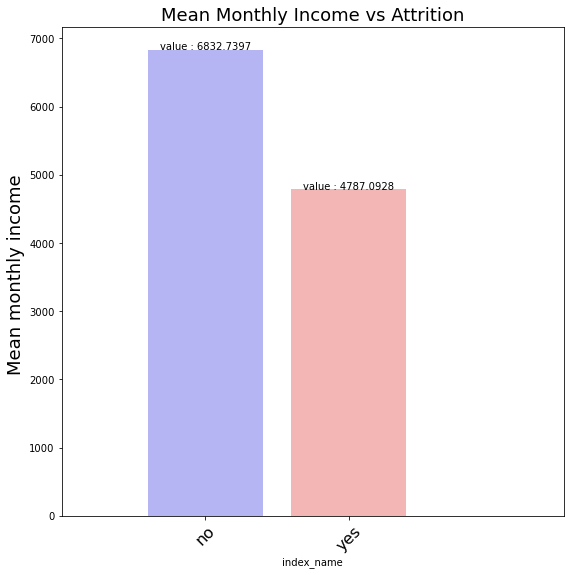

In [118]:
import matplotlib.pyplot as plot
import seaborn as sns
title_txt='Mean Monthly Income vs Attrition'
y_label='Mean monthly income '
x_label=''
item_color='bwr'

data_plot=pd.DataFrame()
data_plot['index_name']=df1.groupby(by='Yes')['MonthlyIncome'].mean().index
data_plot['count_val']=df1.groupby(by='Yes')['MonthlyIncome'].mean().values

def fmt(x):
    return '{:.1f}% '.format(x)

pat_color = sns.color_palette(item_color, len(data_plot))

plt.figure(figsize=(9,9))
explode=[0,0.01]
g=sns.barplot(data=data_plot,x='index_name', y='count_val',palette=pat_color,)
plt.xticks([0,1],['no','yes'],rotation=45,fontsize=16)
for index, row in data_plot.iterrows():
  txt_value='value : '+str(np.round(row.count_val,4))
  g.text(row.name, row.count_val, txt_value, color='black', ha="center",rotation=0)
plt.title(title_txt,fontsize=18)
plt.ylabel(y_label,fontsize=18)
plt.xlim([-1,2.5])
plt.show()

Those that they were attrited were significantly receiving less monthly income compared to others

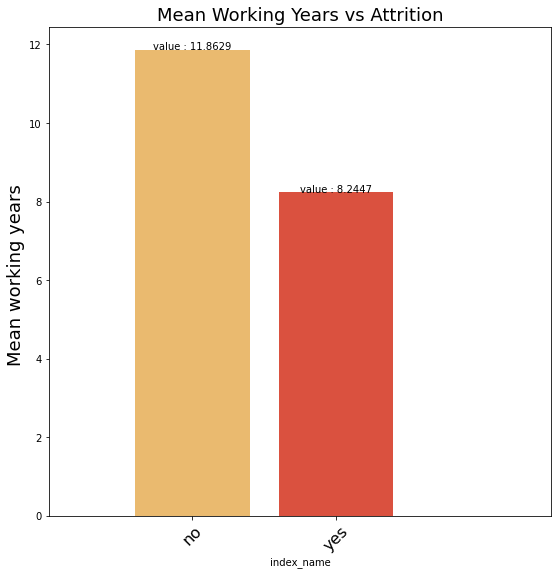

In [119]:
import matplotlib.pyplot as plot
import seaborn as sns
title_txt='Mean Working Years vs Attrition'
y_label='Mean working years '
x_label=''
item_color='YlOrRd'

data_plot=pd.DataFrame()
data_plot['index_name']=df1.groupby(by='Yes')['TotalWorkingYears'].mean().index
data_plot['count_val']=df1.groupby(by='Yes')['TotalWorkingYears'].mean().values

def fmt(x):
    return '{:.1f}% '.format(x)

pat_color = sns.color_palette(item_color, len(data_plot))

plt.figure(figsize=(9,9))
explode=[0,0.01]
g=sns.barplot(data=data_plot,x='index_name', y='count_val',palette=pat_color,)
plt.xticks([0,1],['no','yes'],rotation=45,fontsize=16)
for index, row in data_plot.iterrows():
  txt_value='value : '+str(np.round(row.count_val,4))
  g.text(row.name, row.count_val, txt_value, color='black', ha="center",rotation=0)
plt.title(title_txt,fontsize=18)
plt.ylabel(y_label,fontsize=18)
plt.xlim([-1,2.5])
plt.show()

Those that they were attrited were staying less with their companies

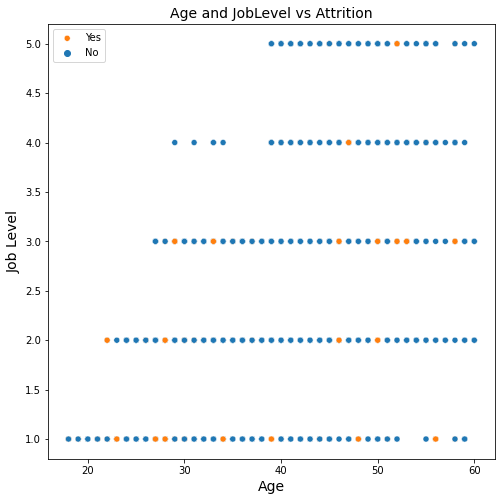

In [120]:
import matplotlib.pyplot as plot
import seaborn as sns
plt.figure(figsize=(8,8))
sns.scatterplot(data=df,x="Age",y="JobLevel",hue="Yes")
plt.legend(['Yes','No'])
plt.title('Age and JobLevel vs Attrition',fontsize=14)
plt.ylabel("Job Level",fontsize=14)
plt.xlabel("Age",fontsize=14)
plt.show()

Attrition happend mostly in lower job levels and could happen in every age

----- Normalization

In [121]:
df2=df1[["Yes", "Age", "JobLevel", "MonthlyIncome", "YearsInCurrentRole", "YearsWithCurrManager", "StockOptionLevel", "TotalWorkingYears"]]
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(df2)
scaled_base = scaler.transform(df2)
data_scaled = pd.DataFrame(scaled_base, index=df1.index, columns=df2.columns)
data_scaled

,Yes,Age,JobLevel,MonthlyIncome,YearsInCurrentRole,YearsWithCurrManager,StockOptionLevel,TotalWorkingYears
0,1.0,0.547619,0.25,0.262454,0.222222,0.294118,0.000000,0.200
1,0.0,0.738095,0.25,0.217009,0.388889,0.411765,0.333333,0.250
2,1.0,0.452381,0.00,0.056925,0.000000,0.000000,0.000000,0.175
3,0.0,0.357143,0.00,0.100053,0.388889,0.000000,0.000000,0.200
4,0.0,0.214286,0.00,0.129489,0.111111,0.117647,0.333333,0.150
...,...,...,...,...,...,...,...,...
1465,0.0,0.428571,0.25,0.082254,0.111111,0.176471,0.333333,0.425
1466,0.0,0.500000,0.50,0.472986,0.388889,0.411765,0.333333,0.225
1467,0.0,0.214286,0.25,0.270300,0.111111,0.176471,0.333333,0.150
1468,0.0,0.738095,0.25,0.230700,0.333333,0.470588,0.000000,0.425


-------- Train and Test Data

In [122]:
data=data_scaled.loc[:,data_scaled.columns!='Yes'].values
lbl=data_scaled.loc[:,data_scaled.columns=='Yes'].values

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data ,
                                                    lbl ,
                                                    test_size=0.20,
                                                    shuffle=True,
                                                    random_state=42)


print('_'*50)
print('X_train shape: {}'.format(X_train.shape))
print('X_test shape:  {}'.format(X_test.shape))
print('_'*50)

__________________________________________________
X_train shape: (1176, 7)
X_test shape:  (294, 7)
__________________________________________________


In [124]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors=5) 
knn = knn.fit(X_train, y_train)

C:\Users\souri\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [125]:
knn.n_samples_fit_

1176

In [126]:
knn.score(X_test, y_test) #calculate the fit on the *test* data

0.8333333333333334

The accuracy by using KNN is 83 percent.

In [127]:
from sklearn.metrics import confusion_matrix
y_test_pred = knn.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_test_pred) #creates a "confusion matrix"
cm

array([[241,  14],
       [ 35,   4]], dtype=int64)

In [128]:
knn.classes_

array([0., 1.])

In [129]:
conf_matrix = pd.DataFrame(cm, index=['No (actual)', 'Yes (actual)'], columns = ['No (predicted)', 'Yes (predicted)']) #make a dataframe, put labels on rows (index) and columns 
conf_matrix

,No (predicted),Yes (predicted)
No (actual),241,14
Yes (actual),35,4


-------- Precesion

In [130]:
4/(14+4) #precision

0.2222222222222222

In [131]:
4/(35+4) # recall

0.10256410256410256

-------- parameter Setting

Evaluate the performance of KNN for different number of neighbors

How the accuracy improves by a loop that iterates from 1 to 10 neighbour 

In [132]:
from sklearn.metrics import classification_report

for i in range(1,11):
    knn_new = KNeighborsClassifier(n_neighbors = i)
    knn_new = knn_new.fit(X_train, y_train) 
    y_test_pred_new = knn_new.predict(X_test) 
    print(f"With {i} neighbors the result is:")
    print(classification_report(y_test, y_test_pred_new))

C:\Users\souri\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\souri\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\souri\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\souri\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

With 1 neighbors the result is:
              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87       255
         1.0       0.25      0.33      0.29        39

    accuracy                           0.78       294
   macro avg       0.57      0.59      0.58       294
weighted avg       0.81      0.78      0.79       294

With 2 neighbors the result is:
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92       255
         1.0       0.22      0.05      0.08        39

    accuracy                           0.85       294
   macro avg       0.55      0.51      0.50       294
weighted avg       0.78      0.85      0.81       294

With 3 neighbors the result is:
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90       255
         1.0       0.16      0.08      0.10        39

    accuracy                           0.82       294
   macro avg       0.51      0.5

C:\Users\souri\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


The accuracy will improve to 87 percent by using 10 neighbours